In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/placement (1).csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape #output is given as (rows, columns)

(100, 4)

In [ ]:
# steps that will be performed
# preprocess + EDA + FUTURE SELECTION
# EXTRACT INPUT AND OUTPUT CELLS
# SCALE THE VALUE
# TRAIN TEST SPLIT
# TRAIN THE MODEL
# EVALUATE THE MODEL / MODEL SELCTION
# Deploy the model

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
df = df.iloc[: , 1:] #meaning i want all the rows but want columes starting from 1

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


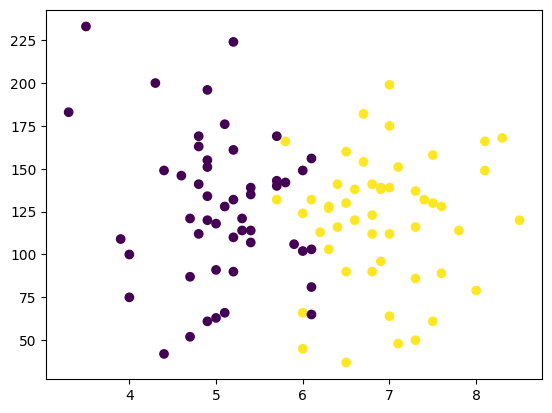

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df["cgpa"],df["iq"], c=df["placement"]) #c is the color attribute used for showing which all people  got placed

In [ ]:
# we will used logestic regression - cuts the data using a line , best when our data shos a linear behavious

In [12]:
#STEP 1 - EXTRACTING INPUT AND OUTPUT
# THE INPUT FEATURES - CGPA AND IQ ARE OUR DEPENDENT VARIABLES AND PLACEMENT IS AN INDEPENDENT VARIABLE

In [14]:
x = df.iloc[:,0:2] #all rows but columns starting from 0 upto 2
y = df.iloc[:,-1]

In [15]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [18]:
#training testing split
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test =train_test_split(x,y,test_size=0.1)

In [19]:
X_train

,cgpa,iq
60,6.9,139.0
36,5.7,140.0
65,8.1,166.0
26,7.0,199.0
64,7.0,64.0
...,...,...
91,7.5,158.0
59,4.8,112.0
66,6.9,96.0
51,4.8,141.0


In [20]:
y_test

,placement
95,0
19,0
73,0
71,1
28,0
16,0
85,1
75,0
14,0
53,1


In [21]:
#SCALING THE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)  #understand the data and transform it

In [24]:
X_train

array([[ 0.75957731,  0.46670215],
       [-0.29484877,  0.49300346],
       [ 1.81400339,  1.17683755],
       [ 0.84744615,  2.04478081],
       [ 0.84744615, -1.50589617],
       [ 1.28679035,  0.22999035],
       [ 0.05662659, -1.05877388],
       [-0.82206182,  1.43985065],
       [-0.90993066, -1.53219748],
       [ 2.16547875, -0.03302276],
       [ 0.93531499,  0.78231788],
       [ 0.67170847, -0.82206208],
       [-0.82206182, -1.45329355],
       [ 0.58383963,  0.86122181],
       [-0.11911109, -0.40124111],
       [-0.29484877,  0.28259297],
       [-1.78861906, -1.21658175],
       [-0.29484877,  0.57190739],
       [-0.9977995 ,  0.88752313],
       [ 0.58383963,  1.59765852],
       [ 0.93531499, -1.92671714],
       [-0.5584553 ,  0.36149691],
       [-0.29484877,  1.25574148],
       [ 0.49597079, -0.03302276],
       [ 1.11105267, -0.92726733],
       [ 1.19892151,  0.28259297],
       [ 0.23236427,  0.17738773],
       [ 1.11105267, -0.138228  ],
       [-0.90993066,

In [26]:
X_test = scaler.transform(X_test)
X_test

array([[  4.3, 200. ],
       [  5.2, 132. ],
       [  4.9,  61. ],
       [  6.1, 132. ],
       [  5.2,  90. ],
       [  5.2, 224. ],
       [  5.8, 166. ],
       [  4.8, 169. ],
       [  6.1, 103. ],
       [  8.3, 168. ]])

In [27]:
#TRAING THE MODEL
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LogisticRegression()

In [29]:
#THE TRAINING STEP
clf.fit(X_train ,y_train)

LogisticRegression()

In [32]:
#model evaluation
y_pred =clf.predict(X_test)

In [31]:
y_test

,placement
95,0
19,0
73,0
71,1
28,0
16,0
85,1
75,0
14,0
53,1


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6

<Axes: >

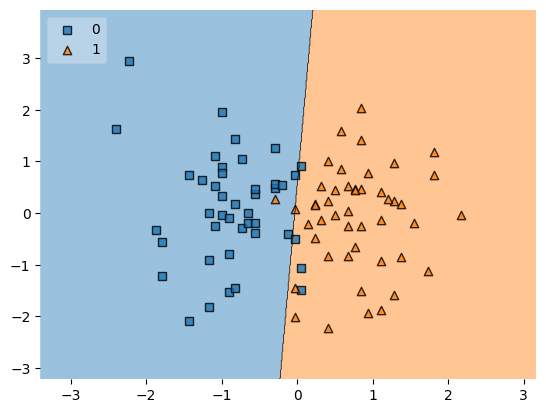

In [38]:
#how to plot decision boundery
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values ,clf=clf , legend=2)

In [39]:
import pickle
pickle.dump(clf,open('model.pk1','wb'))